In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.model_selection import train_test_split
import re


In [56]:
df = pd.read_csv('hyderabad_first_type_000.csv')


df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,1.35 Cr,N,3,Sri Aditya Homes Pvt. Ltd.,Y,Shaikpet,Apartment,Builder,Y,Ranjani,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_50279054,***super area*1895 sqft****status**\t\t\t\t\t\...


In [57]:
crore_prices_index = df[df['Price'].str.contains('Cr')].index
df.drop(crore_prices_index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,78.4 Lac,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...


In [58]:
pattern = r'(\d+)-Sq-ft'
df['Sqft'] = df['Link'].str.extract(pattern)
pattern = r'(\d+)'
df['Price'] = df['Price'].str.extract(pattern)
df.head()


,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other,Sqft
0,49,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...,1285
1,79,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...,1268
2,86,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...,1150
3,40,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...,918
4,78,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...,1174


In [60]:
df.drop(columns=["Agent","Prime Location","Paid User","Carpet Area"], inplace=True)
df.drop(columns=["User Type","Link","Prop ID"], inplace=True)
df.drop(columns=["Other"], inplace=True)
df.head()


KeyError: "['Agent', 'Prime Location', 'Paid User', 'Carpet Area'] not found in axis"

In [6]:
#df.to_excel("hyd_prices.xlsx")


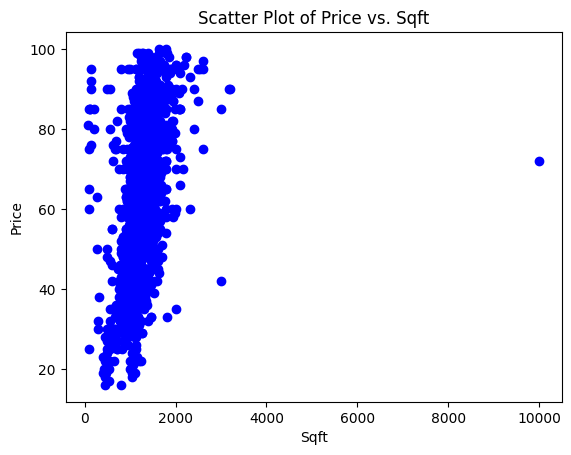

In [61]:
d = df.sample(frac=0.2,random_state=42)

plt.scatter(df['Sqft'].astype(float), df['Price'].astype(float), color='blue')
plt.xlabel('Sqft')
#plt.xlim(0,2500)
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft')
plt.show()


LINEAR REGRESSION

In [62]:
reg_obj = linear_model.LinearRegression()
df.dropna(subset=['Sqft'], inplace=True)

reg_obj.fit(df[['Sqft']].values.reshape(-1, 1), df['Price'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 1870
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          1795 non-null   object
 1   Bedrooms       1789 non-null   object
 2   Builder        148 non-null    object
 3   Locality       1711 non-null   object
 4   Property Type  1795 non-null   object
 5   Sqft           1795 non-null   object
dtypes: object(6)
memory usage: 98.2+ KB


In [63]:
predicted_price = reg_obj.predict(np.array([2000]).reshape(-1, 1))
print(predicted_price)

[79.00266578]


In [64]:
print(reg_obj.intercept_)
reg_obj.coef_

35.07647128228663


array([0.0219631])

DATA CLEANING AND ANALYSIS

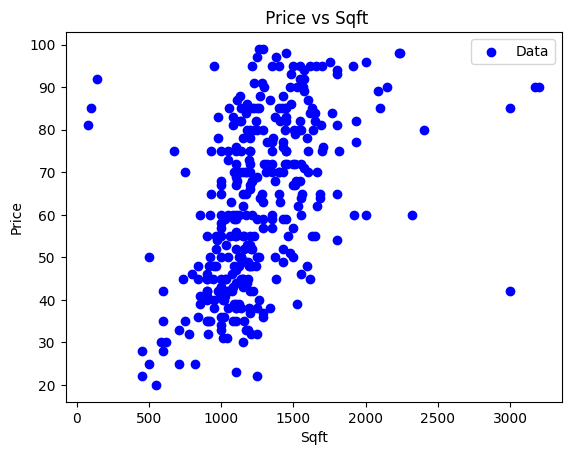

In [65]:
d['Sqft'] = pd.to_numeric(d['Sqft'])
d['Price'] = pd.to_numeric(d['Price'])
plt.scatter(d['Sqft'], d['Price'], color='blue', label='Data')

# pred = [1000, 1200, 3000, 2000, 2400, 1600, 1989]

#  plt.plot(pred, reg_obj.predict(np.array(pred).reshape(-1, 1)), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title(' Price vs Sqft')

# Show legend
plt.legend()


In [66]:
df.describe()

,Price,Bedrooms,Builder,Locality,Property Type,Sqft
count,1795,1789,148,1711,1795,1795
unique,85,7,142,463,6,509
top,75,2,Real Estate,Bachupally,Apartment,1100
freq,74,1159,3,57,1575,79


In [67]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

groupeddata = df.groupby('Locality')['Price'].mean().reset_index()
random_locations = groupeddata['Locality'].sample(n=30, random_state=42)
sample_df = groupeddata[groupeddata['Locality'].isin(random_locations)]
sample_df.head()


,Locality,Price
0,A S Rao Nagar Rd,54.500000
9,Adibatla,51.666667
18,Alwal,62.000000
30,Appa junction,70.888889
39,Baba Nagar,85.000000


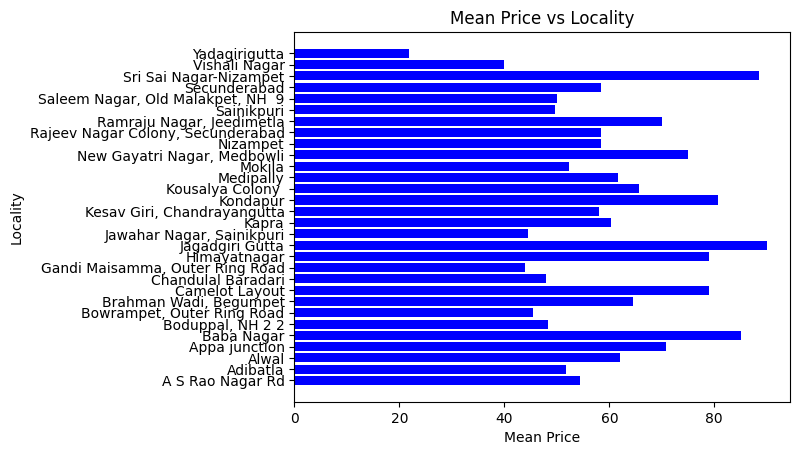

In [68]:
plt.barh(sample_df['Locality'], sample_df['Price'],color='blue')
plt.ylabel('Locality')
plt.xlabel('Mean Price')
plt.title('Mean Price vs Locality')
plt.show()


Adibatla Manikonda, Outer Ring Road Hitech City Aminpur Moti Nagar LB Nagar, NH  9 Tellapur, Outer Ring Road Kompally Srisailam Highway Bachupally Miyapur, NH  9 Kokapet, Outer Ring Road Alkapur Township, Manikonda, Outer Ring Road Uppal, NH 2 2 Chandanagar, NH  9 Hyder Nagar, NH  9 Tellapur, Outer Ring Road Manikonda, Outer Ring Road Bachupally Toli Chowki Shamirpet Nizampet Tellapur, Outer Ring Road Nagole Gundlapochampally, Outer Ring Road Tukkuguda, Srisailam Highway Bachupally LB Nagar, NH  9 Bahadurpally Kollur, Outer Ring Road Madinaguda, Hafeezpet, NH  9 Nallagandla, Serilingampally Adibatla Adibatla Hydershakote Miyapur, NH  9 Bachupally Yapral Bachupally Malkajgiri Alwal Kondakal Aminpur Bachupally Bachupally Aminpur Sai Anurag Colony Chaitanyapuri, Kothapet Aminpur Kousalya Colony  Masjid Banda Narapally Kollur, Outer Ring Road Chanda Nagar Tellapur, Outer Ring Road Kollur, Outer Ring Road Chanda Nagar Miyapur, NH  9 Kollur, Outer Ring Road Gundlapochampally, Outer Ring Road

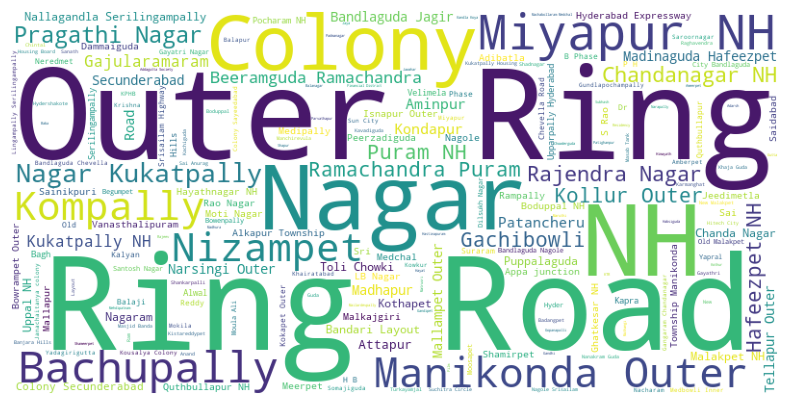

In [69]:
from wordcloud import WordCloud

text = ' '.join(df['Locality'].dropna())
print(text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [70]:
df.sample()

,Price,Bedrooms,Builder,Locality,Property Type,Sqft
1672,56,2,NaN,Kompally,Apartment,1334


In [71]:
groupeddata = df.groupby('Builder')['Price'].mean().reset_index()
random_locations = groupeddata['Builder'].sample(n=30, random_state=42)
sample_df = groupeddata[groupeddata['Builder'].isin(random_locations)]
sample_df.head()


,Builder,Price
4,ASV Property Management,93.0
9,Amma Developers,30.0
11,Anmol,76.0
12,Anuhar Homes Pvt. Ltd.,73.0
18,CHR Properties,85.0


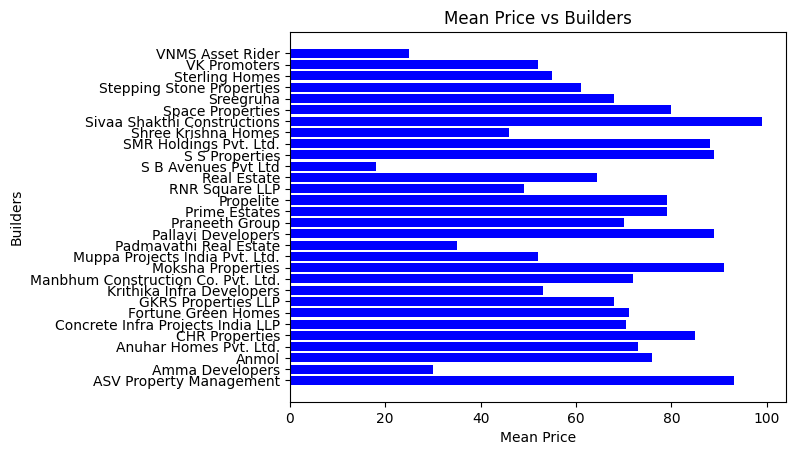

In [72]:
plt.barh(sample_df['Builder'], sample_df['Price'],color='blue')
plt.ylabel('Builders')
plt.xlabel('Mean Price')
plt.title('Mean Price vs Builders')
plt.show()


MULTIPLE LINEAR REGRESSION


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


In [74]:
X = df[['Locality', 'Sqft']]
X_encoded = pd.get_dummies(X, columns=['Locality'], drop_first=True)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [75]:
predictions = model.predict(X_test)
print((predictions[:5]))


[ 5.85251058e+01  7.06065547e+01  4.83877641e+01  7.63034044e+01
 -3.56156322e+10]


In [76]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  2.2021645888162814e+21
mean_absolute_error :  5584765116.849771


Temp


In [77]:
df.head()

,Price,Bedrooms,Builder,Locality,Property Type,Sqft
0,49,2,ELV Projects Private Limited,Adibatla,Apartment,1285
1,79,2,NaN,"Manikonda, Outer Ring Road",Apartment,1268
2,86,2,Silversand Infratech Pvt. Ltd,Hitech City,Apartment,1150
3,40,2,NaN,Aminpur,Apartment,918
4,78,2,BEL,Moti Nagar,Apartment,1174


In [78]:
df.drop(columns=["Builder","Property Type","Bedrooms"], inplace=True)
df.head()

,Price,Locality,Sqft
0,49,Adibatla,1285
1,79,"Manikonda, Outer Ring Road",1268
2,86,Hitech City,1150
3,40,Aminpur,918
4,78,Moti Nagar,1174


In [79]:
df.isnull().sum()

Price        0
Locality    84
Sqft         0
dtype: int64

In [80]:
df.dropna(inplace=True)
df.isnull().sum()

Price       0
Locality    0
Sqft        0
dtype: int64

In [81]:
df['Locality'].value_counts()

Locality
Bachupally                    57
Miyapur, NH  9                54
Kompally                      47
Nizampet                      42
Pragathi Nagar, Kukatpally    41
                              ..
Anand Nagar                    1
Vinayaka Nagar                 1
Vishali Nagar                  1
Bharat Nagar, Moosapet         1
Officers Colony                1
Name: count, Length: 463, dtype: int64

In [ ]:
df['Locality'].unique()

array(['Adibatla', 'Manikonda, Outer Ring Road', 'Hitech City', 'Aminpur',
       'Moti Nagar', 'LB Nagar, NH  9', 'Tellapur, Outer Ring Road',
       'Kompally', 'Srisailam Highway', 'Bachupally', 'Miyapur, NH  9',
       'Kokapet, Outer Ring Road',
       'Alkapur Township, Manikonda, Outer Ring Road', 'Uppal, NH 2 2',
       'Chandanagar, NH  9', 'Hyder Nagar, NH  9', 'Toli Chowki',
       'Shamirpet', 'Nizampet', 'Nagole',
       'Gundlapochampally, Outer Ring Road',
       'Tukkuguda, Srisailam Highway', 'Bahadurpally',
       'Kollur, Outer Ring Road', 'Madinaguda, Hafeezpet, NH  9',
       'Nallagandla, Serilingampally', 'Hydershakote', 'Yapral',
       'Malkajgiri', 'Alwal', 'Kondakal', 'Sai Anurag Colony',
       'Chaitanyapuri, Kothapet', 'Kousalya Colony ', 'Masjid Banda',
       'Narapally', 'Chanda Nagar', 'Bandlaguda, Nagole', 'Muthyalaguda',
       'Chowderguda', 'Velimela', 'Suraram', 'Isnapur, Outer Ring Road',
       'Sadashivpet', 'Lingampally-Serilingampally, NH 2 2

In [82]:
df[df['Locality'].str.find('Manikonda')==0].count()


Price       39
Locality    39
Sqft        39
dtype: int64

In [83]:
indices=[]
vc=df['Locality'].value_counts()
vals =[]
for i,v in vc.items():
  if v>=47:
    indices.append(i)
    vals.append(v)
print(vals)
print(indices)

[57, 54, 47]
['Bachupally', 'Miyapur, NH  9', 'Kompally']


([0, 1, 2],
 [Text(0, 0, 'Bachupally'),
  Text(1, 0, 'Miyapur, NH  9'),
  Text(2, 0, 'Kompally')])

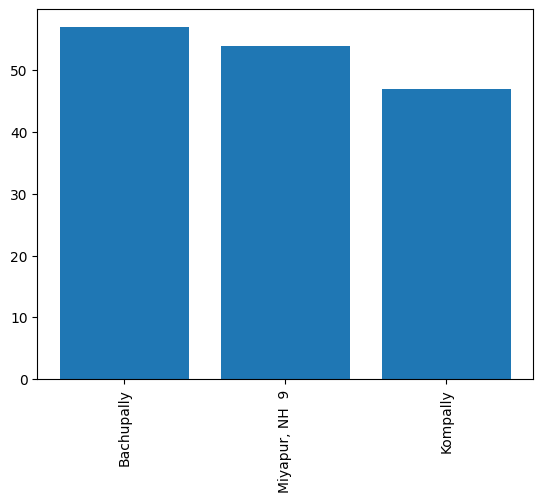

In [ ]:
plt.bar(indices,vals)
plt.xticks(rotation=90)

In [84]:
new_df = df[df['Locality'].isin(indices)]


In [85]:
new_df

,Price,Locality,Sqft
7,72,Kompally,1249
9,79,Bachupally,1651
10,59,"Miyapur, NH 9",1210
18,71,Bachupally,1193
26,99,Bachupally,1800
...,...,...,...
1735,52,"Miyapur, NH 9",1085
1799,68,"Miyapur, NH 9",1215
1806,52,Kompally,842
1822,68,Bachupally,1620


In [86]:
new_df.isnull().sum()

Price       0
Locality    0
Sqft        0
dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [88]:
enc = LabelEncoder()
new_df['Locality'] = enc.fit_transform(new_df['Locality'])

C:\Users\divya\AppData\Local\Temp\ipykernel_2736\3028564913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Locality'] = enc.fit_transform(new_df['Locality'])


In [89]:
new_df.head()

,Price,Locality,Sqft
7,72,1,1249
9,79,0,1651
10,59,2,1210
18,71,0,1193
26,99,0,1800


In [90]:
new_df['Locality'].value_counts()

Locality
0    57
2    54
1    47
Name: count, dtype: int64

In [91]:
ss = StandardScaler()
new_df['Sqft'] = ss.fit_transform(new_df[['Sqft']])

new_df['Price'] = ss.fit_transform(new_df[['Price']])


C:\Users\divya\AppData\Local\Temp\ipykernel_2736\472951143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sqft'] = ss.fit_transform(new_df[['Sqft']])
C:\Users\divya\AppData\Local\Temp\ipykernel_2736\472951143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price'] = ss.fit_transform(new_df[['Price']])


In [92]:
new_df.head()

,Price,Locality,Sqft
7,0.490290,1,-0.162469
9,0.924445,0,1.130846
10,-0.315999,2,-0.287939
18,0.428267,0,-0.342632
26,2.164889,0,1.610209


In [93]:
new_df.shape


(158, 3)

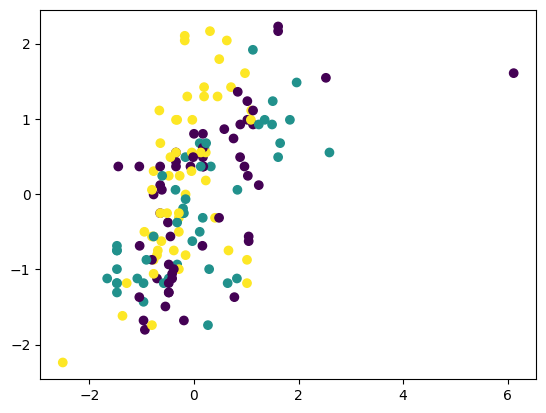

In [94]:
plt.scatter(new_df['Sqft'], new_df['Price'], c=new_df['Locality'],cmap='viridis')

KNN

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score


In [96]:
x_train, x_test, y_train, y_test = train_test_split(new_df.iloc[:,1:], new_df['Price'], test_size=0.2, random_state=43)

In [97]:
x_train.shape
x_train

,Locality,Sqft
84,0,-0.191423
1841,2,-0.046649
1084,1,-0.320111
619,0,0.966769
367,2,-1.285271
...,...,...
535,2,-0.342632
168,2,0.452017
500,0,0.178555
599,1,1.648815


In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
mod = KNeighborsRegressor(n_neighbors=5)
mod.fit(x_train, y_train)

KNeighborsRegressor()

In [100]:
y_pred = mod.predict(x_test)

In [101]:
mean_squared_error(y_test, y_pred)

0.6193131937515648

In [102]:
r2_score(y_test, y_pred)

0.2519277611398494

Decision Trees

In [103]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [104]:
mod1 = DecisionTreeRegressor()
mod1.fit(x_train, y_train)

DecisionTreeRegressor()

In [105]:
y_pred = mod1.predict(x_test)

In [106]:
r2_score(y_pred,y_test)

0.6373618862872354

In [107]:
mean_squared_error(y_test, y_pred)

0.3726110196189215

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


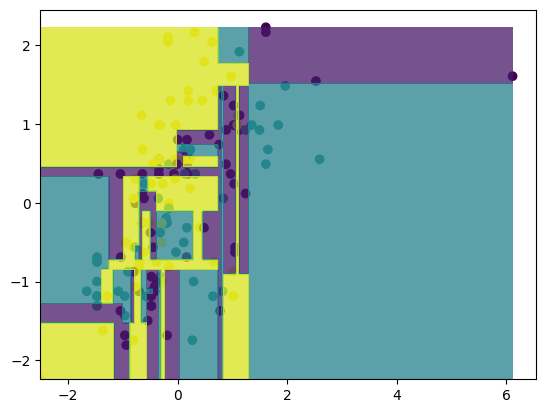

In [ ]:
plt.scatter(new_df['Sqft'], new_df['Price'], c=new_df['Locality'],cmap='viridis')
x = np.meshgrid(np.arange(min(new_df['Sqft']), max(new_df['Sqft']), 0.01), np.arange(min(new_df['Price']), max(new_df['Price']), 0.01))
plt.contourf(x[0], x[1], mod.predict(np.c_[x[0].ravel(), x[1].ravel()]).reshape(x[0].shape), alpha=0.75, cmap='viridis')
plt.show()

[Text(0.4706483644859813, 0.96875, 'Locality <= -0.364\nsquared_error = 1.018\nsamples = 126\nvalue = -0.072'),
 Text(0.1582943925233645, 0.90625, 'Locality <= -0.856\nsquared_error = 0.477\nsamples = 52\nvalue = -0.733'),
 Text(0.0397196261682243, 0.84375, 'Locality <= -2.083\nsquared_error = 0.33\nsamples = 17\nvalue = -1.122'),
 Text(0.030373831775700934, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = -2.239'),
 Text(0.04906542056074766, 0.78125, 'Locality <= -1.406\nsquared_error = 0.268\nsamples = 16\nvalue = -1.053'),
 Text(0.030373831775700934, 0.71875, 'Locality <= -1.459\nsquared_error = 0.31\nsamples = 5\nvalue = -0.676'),
 Text(0.02102803738317757, 0.65625, 'Locality <= -1.565\nsquared_error = 0.048\nsamples = 4\nvalue = -0.936'),
 Text(0.011682242990654205, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = -1.122'),
 Text(0.030373831775700934, 0.59375, 'squared_error = 0.049\nsamples = 3\nvalue = -0.874'),
 Text(0.0397196261682243, 0.65625, 'squared_error = 0.0\nsamp

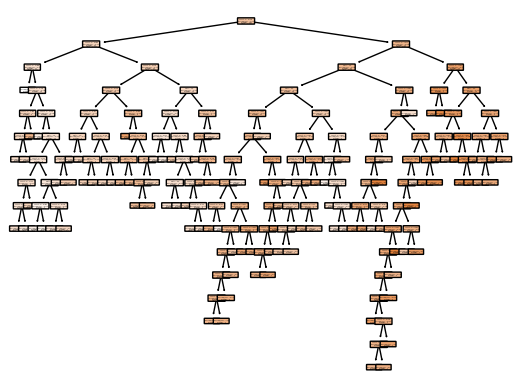

In [109]:
plot_tree(mod1, filled=True, feature_names=['Sqft', 'Locality'], rounded=True)


KNN Classifier


In [110]:
new_df.sample(4)

,Price,Locality,Sqft
122,0.552312,0,-0.342632
596,-1.184310,0,-0.480971
367,-1.184310,2,-1.285271
1236,0.242201,1,-0.606442


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
x_train, x_test, y_train, y_test = train_test_split(new_df[['Sqft','Price']], new_df['Locality'], test_size=0.2, random_state=43)

In [113]:
mod = KNeighborsClassifier(n_neighbors=2)
mod.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [114]:
y_pred = mod.predict(x_test)

In [115]:
accuracy_score(y_test, y_pred)

0.5

Decision Classifier


In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
mod = DecisionTreeClassifier()
mod.fit(x_train, y_train)
y_pred = mod.predict(x_test)
accuracy_score(y_test, y_pred)

0.5

saving model

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(mod1)


In [ ]:
saved_model

In [ ]:
import pickle

In [ ]:
with open('/content/model.pkl', 'wb') as file:
    pickle.dump(mod1, file)
file.close()